In [66]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib

In [36]:
dataset_train = 5
dataset_test = 5

X_train = pd.read_csv('datasets/{}_X_train.csv'.format(dataset_train), low_memory=False)
X_test = pd.read_csv('datasets/{}_X_test.csv'.format(dataset_test), low_memory=False)
y_train = pd.read_csv('datasets/{}_y_train.csv'.format(dataset_train), low_memory=False, header=None)
y_test = pd.read_csv('datasets/{}_y_test.csv'.format(dataset_test), low_memory=False, header=None)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train = pd.Series(y_train[0])
y_test = pd.Series(y_test[0])
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(389599, 9) (191516, 9) (389599, 1) (191516, 1)
(389599, 9) (191516, 9) (389599,) (191516,)


In [37]:
xgbm = xgb.XGBClassifier(**params)
xgtrain = xgb.DMatrix(X_train, label=y_train)
params = xgbm.get_xgb_params()
cvresult = xgb.cv(params, xgtrain, num_boost_round=10000, nfold=5, metrics='error', early_stopping_rounds=50, verbose_eval=True)

print np.min(cvresult)

[0]	train-error:0.112163+0.000279759	test-error:0.112163+0.00111861
[1]	train-error:0.112163+0.000279759	test-error:0.112163+0.00111861
[2]	train-error:0.11216+0.00027904	test-error:0.112158+0.00111989
[3]	train-error:0.112152+0.000267427	test-error:0.112152+0.00113092
[4]	train-error:0.112141+0.000261525	test-error:0.112137+0.00114587
[5]	train-error:0.112084+0.000277598	test-error:0.112129+0.00114742
[6]	train-error:0.112051+0.000262523	test-error:0.11207+0.00117352
[7]	train-error:0.112035+0.000272547	test-error:0.11207+0.00114715
[8]	train-error:0.112024+0.000289743	test-error:0.112088+0.00113977
[9]	train-error:0.111999+0.000298813	test-error:0.112122+0.00114555
[10]	train-error:0.111971+0.000302836	test-error:0.112093+0.00113066
[11]	train-error:0.111939+0.000281628	test-error:0.112083+0.00110138
[12]	train-error:0.111928+0.000292787	test-error:0.112104+0.00112929
[13]	train-error:0.111908+0.000316926	test-error:0.112091+0.00111404
[14]	train-error:0.111868+0.000325478	test-error

In [61]:
params = {'objective''metric':'binary_error'}

if dataset_train == 5:
    params = {
        'learning_rate':0.5,
        'n_estimators':47,
        'max_depth':5,
        'min_child_weight':5,
        'gamma':3.5,
        'subsample':0.9,
        'colsample_bytree':0.8,
        'reg_alpha':1.5
    }

elif dataset_train == 10:
    params = {
        'learning_rate':0.1,
        'max_depth':9,
        'min_child_weight':3,
        'gamma':12,
        'subsample':0.7,
        'colsample_bytree':0.7,
        'reg_alpha':1e-5,
    }

In [62]:
classifier = xgb.XGBClassifier(**params).fit(X_train,y_train)

In [63]:
y_pred = classifier.predict(X_test)

print "Baseline"
print accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test)
print "Our Prediction"
print accuracy_score(y_pred=y_pred, y_true=y_test)
print confusion_matrix(y_pred=y_pred, y_true=y_test)

Baseline
0.887774389607
Our Prediction
0.887492428831
[[169661    362]
 [ 21185    308]]


In [59]:
gridParams = {
    #'max_depth' : range(4,7,1),
    #'min_child_weight' : range(4,7,1)
    #'gamma':np.linspace(0,5,11)
    #'subsample':np.linspace(0.5,1,6),
    #'colsample_bytree':np.linspace(0.5,1,6),    
    'reg_alpha':np.concatenate(([1e-5,1e-4,1e-3], (np.linspace(0,5,11))))
    #'learning_rate' : np.linspace(0.1,1,10)
}

mdl = xgb.XGBClassifier(**params)

grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, n_jobs=1, scoring='accuracy')
grid.fit(X_train, y_train)

grid.grid_scores_, grid.best_score_, grid.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] reg_alpha=1e-05 .................................................
[CV] .................................. reg_alpha=1e-05, total=   7.6s
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] .................................. reg_alpha=1e-05, total=   7.4s
[CV] reg_alpha=1e-05 .................................................
[CV] .................................. reg_alpha=1e-05, total=   7.4s
[CV] reg_alpha=1e-05 .................................................
[CV] .................................. reg_alpha=1e-05, total=   7.5s
[CV] reg_alpha=1e-05 .................................................
[CV] .................................. reg_alpha=1e-05, total=  10.7s
[CV] reg_alpha=0.0001 ................................................
[CV] ................................. reg_alpha=0.0001, total=   7.5s
[CV] reg_alpha=0.0001 ................................................
[CV] ................................. reg_alpha=0.0001, total=   7.6s
[CV] reg_alpha=0.0001 ................................................
[CV] ................................. reg_alpha=0.0001, total=   7.6s
[CV] reg_alpha=0.0001 ................................................
[CV] .

[CV] .................................... reg_alpha=4.0, total=   7.6s
[CV] reg_alpha=4.5 ...................................................
[CV] .................................... reg_alpha=4.5, total=   7.5s
[CV] reg_alpha=4.5 ...................................................
[CV] .................................... reg_alpha=4.5, total=   7.6s
[CV] reg_alpha=4.5 ...................................................
[CV] .................................... reg_alpha=4.5, total=   7.8s
[CV] reg_alpha=4.5 ...................................................
[CV] .................................... reg_alpha=4.5, total=   7.6s
[CV] reg_alpha=4.5 ...................................................
[CV] .................................... reg_alpha=4.5, total=   7.6s
[CV] reg_alpha=5.0 ...................................................
[CV] .................................... reg_alpha=5.0, total=   7.7s
[CV] reg_alpha=5.0 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  9.7min finished
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.88812, std: 0.00013, params: {'reg_alpha': 1.0000000000000001e-05},
  mean: 0.88812, std: 0.00013, params: {'reg_alpha': 0.0001},
  mean: 0.88810, std: 0.00012, params: {'reg_alpha': 0.001},
  mean: 0.88812, std: 0.00013, params: {'reg_alpha': 0.0},
  mean: 0.88793, std: 0.00011, params: {'reg_alpha': 0.5},
  mean: 0.88795, std: 0.00010, params: {'reg_alpha': 1.0},
  mean: 0.88815, std: 0.00013, params: {'reg_alpha': 1.5},
  mean: 0.88804, std: 0.00025, params: {'reg_alpha': 2.0},
  mean: 0.88791, std: 0.00015, params: {'reg_alpha': 2.5},
  mean: 0.88794, std: 0.00025, params: {'reg_alpha': 3.0},
  mean: 0.88797, std: 0.00013, params: {'reg_alpha': 3.5},
  mean: 0.88814, std: 0.00014, params: {'reg_alpha': 4.0},
  mean: 0.88800, std: 0.00016, params: {'reg_alpha': 4.5},
  mean: 0.88806, std: 0.00009, params: {'reg_alpha': 5.0}],
 0.88815166363363351,
 {'reg_alpha': 1.5})

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


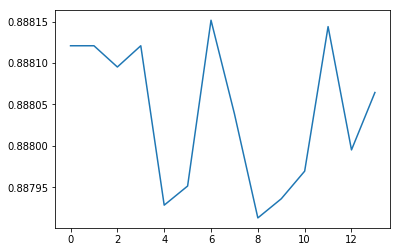

In [60]:
scores = [x[1] for x in grid.grid_scores_]
plt.plot(range(0,len(scores)), scores)
plt.show()

In [5]:
#check candidates for LightGBM
for ds in range(1,13):
    dataset_train = ds
    dataset_test = ds

    print ds
    X_train = pd.read_csv('datasets/{}_X_train.csv'.format(dataset_train), low_memory=False)
    X_test = pd.read_csv('datasets/{}_X_test.csv'.format(dataset_test), low_memory=False)
    y_train = pd.read_csv('datasets/{}_y_train.csv'.format(dataset_train), low_memory=False, header=None)
    y_test = pd.read_csv('datasets/{}_y_test.csv'.format(dataset_test), low_memory=False, header=None)
    #print X_train.shape, X_test.shape, y_train.shape, y_test.shape

    y_train = pd.Series(y_train[0])
    y_test = pd.Series(y_test[0])
    print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    classifier = xgb.XGBClassifier().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print "Baseline:", accuracy_score(y_pred=np.zeros(len(y_test)), y_true=y_test)
    print accuracy_score(y_pred=y_pred, y_true=y_test)

1
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)
Baseline: 0.888848484848
0.88896969697
2
(16750, 998) (8250, 998) (16750, 1) (8250, 1)
(16750, 998) (8250, 998) (16750,) (8250,)
Baseline: 0.892121212121
0.892
3
(16750, 999) (8250, 999) (16750, 1) (8250, 1)
(16750, 999) (8250, 999) (16750,) (8250,)
Baseline: 0.889212121212
0.889090909091
4
(382434, 9) (187970, 9) (382434, 1) (187970, 1)
(382434, 9) (187970, 9) (382434,) (187970,)
Baseline: 0.885614725754
0.885588125765
5
(389599, 9) (191516, 9) (389599, 1) (191516, 1)
(389599, 9) (191516, 9) (389599,) (191516,)
Baseline: 0.887774389607
0.887810940078
6
(389556, 9) (191344, 9) (389556, 1) (191344, 1)
(389556, 9) (191344, 9) (389556,) (191344,)
Baseline: 0.887934818965
0.887872104691
7
(382464, 26) (188120, 26) (382464, 1) (188120, 1)
(382464, 26) (188120, 26) (382464,) (188120,)
Baseline: 0.884860727195
0.885020199872
8
(389695, 26) (191497, 26) (389695, 1) (191497, 1)
(389695, 26) (191497, 26) (3

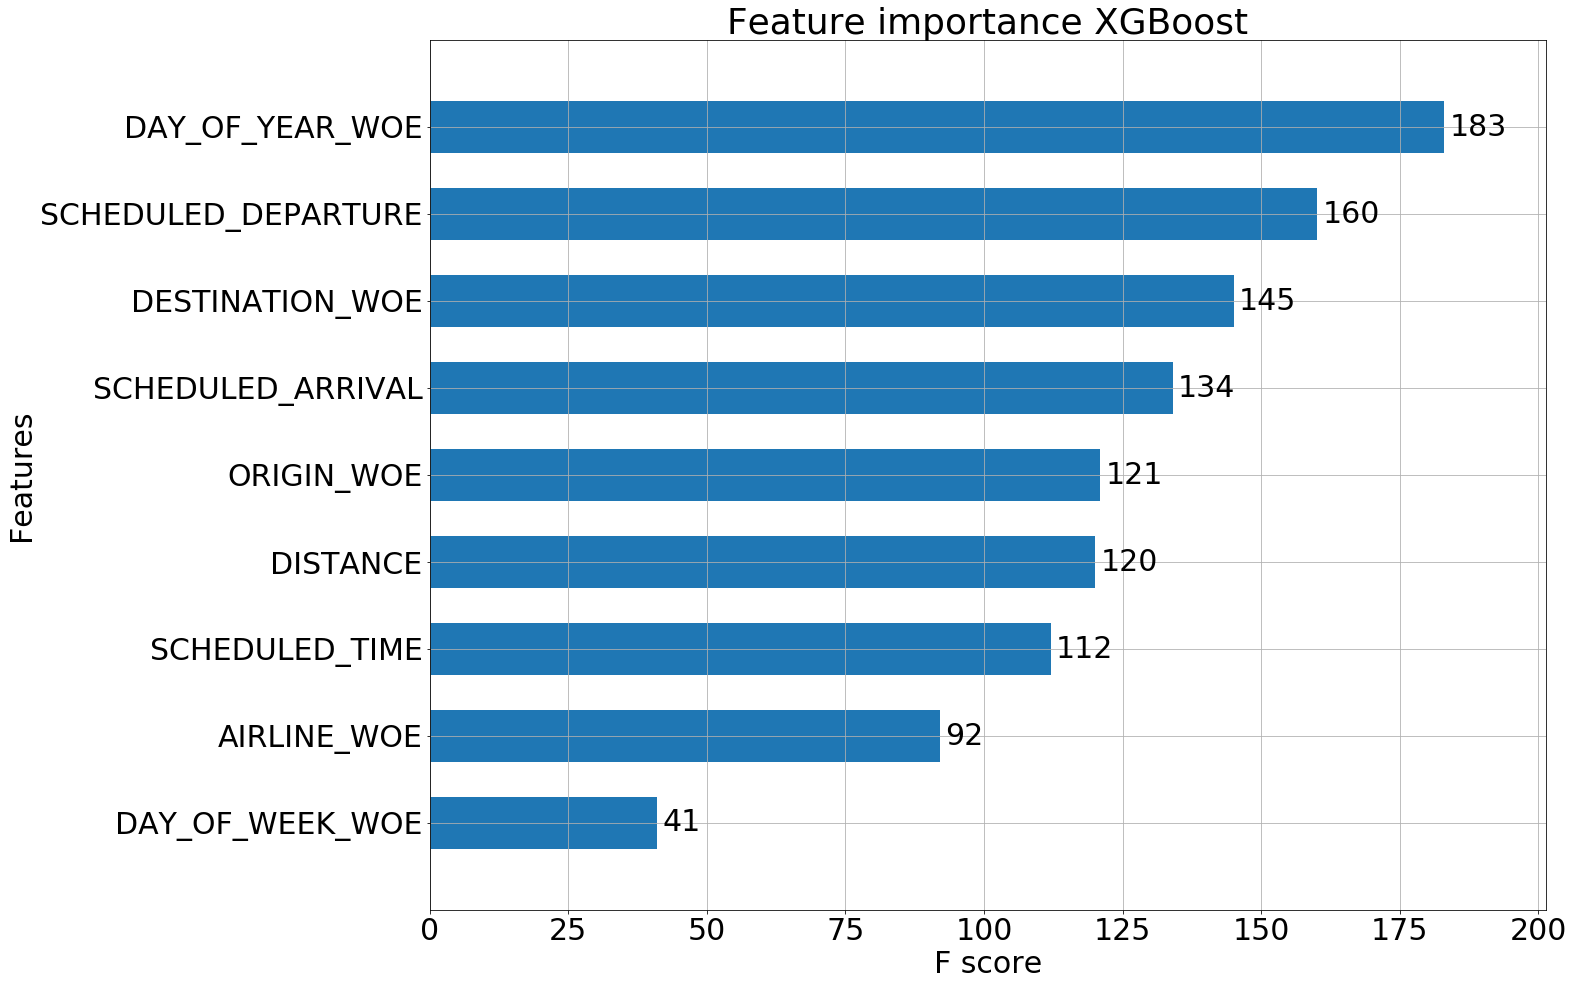

In [71]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
matplotlib.rcParams.update({'font.size': 30})
xgb.plot_importance(classifier, height=0.6, ax=ax, title="Feature importance XGBoost")
plt.show()